# Practical 11-1: Uninformed Search

## 1.1 Search Problems

▪ A search problem consists of: 

\>>> A **State Space**: Set of all possible states where you can be.

\>>> A **Start State**: The state from where the search begins.

\>>> A **Goal Test**: A function that looks at the current state returns whether or not it is the goal state.

▪ The solution to a search problem is a sequence of actions, called the plan that transforms the start state to the goal state.

▪ This plan is achieved through search algorithms.

## 1.2 State Space

▪ A state space refers to the set of all states reachable from the initial state by any sequence of actions.

▪ For instance, the map of Romania can be interpreted as a state-space graph if we view each road as standing for two driving actions, one in each direction.

![map.jpg](map.jpg)

## 1.3 Search Algorithms

▪ A search algorithm is an algorithm designed to solve a search problem.

▪ In general, search algorithms can be divided into **uninformed search** and **informed search**.

▪ **Uninformed search** is a searching technique that **has no additional information about the distance from the current state to the goal**. 

▪ **Informed Search** is another technique that **has additional information about the estimate distance from the current state to the goal**.

https://www.geeksforgeeks.org/search-algorithms-in-ai/

## 1.4 A Simple Search Problem

### 1.4.1 Creating an Undirected Graph Using List and Dictionary

▪ Suppose we have the following map as our problem state space, create a graph to represent the map using dictionaries where the key represents the parent node and the value represents the child nodes.

▪ For instance, 'A' is the parent of 'B' and 'C'. Therefore, 'A' is the key and both 'B' and 'C' are the values represented using a list.

![graph.jpg](graph.jpg)

### 1.4.2 Defining a Graph

In [ ]:
graph_1 = {'A':['B',"C"],
           'B':['A','D','E'],
           'C':['A','F'],
           'D':['B'],
           'E':['B','F'],
           'F':['C','E']}

print(graph_1)

### 1.4.3 Problem Solving

▪ Write a function named **find_path()** to determine a path between two nodes in a graph where:

\>>> **Input**: It takes a graph, the start node and the end node as arguments (see image below)

\>>> **Process**: It tries each possibility in turn until it finds a solution.

\>>> **Output**: It returns a list of nodes comprising the path; and it returns None when no path can be found.

\>>> **Constraint**: The same node will not occur more than once on the path returned to **avoid loopy path**.

<img src="function.png" width="700">

### 1.4.4 Path Finding Solution

In [ ]:
# The first arg stores a graph, and the last arg is used to keep the sequence of nodes to form a path
def find_path(graph, start, end, path = []):
    
    # If the start node is not found in the graph
    if start not in graph or end not in graph: 
        return None

    # Combine two lists
    path = path + [start] 
    
    # The goal node is found, so the path is returned
    if start == end:
        return path
    
    # Iterate through the list to retrieve the child nodes
    for node in graph[start]:
        
        # To avoid repeated state, if a node is in the path, then the loop will proceed to the next round
        if node not in path: 
            # Recursion is useful in implementing the algorithm
            new_path = find_path(graph, node, end, path)
            
            # If new_path is not empty, it means that a path/solution is found, then the new_path will be returned
            if new_path:
                return new_path
    return None

### 1.4.5 Example \#1

▪ Find a path from node B to C using the solution developed above.

<img src="graph.jpg" width="250">

In [ ]:
print("Path from B to C = ", find_path(graph_1, 'B', 'C'))

### 1.4.6 How Does It Work?

![explanation.jpg](explanation.jpg)

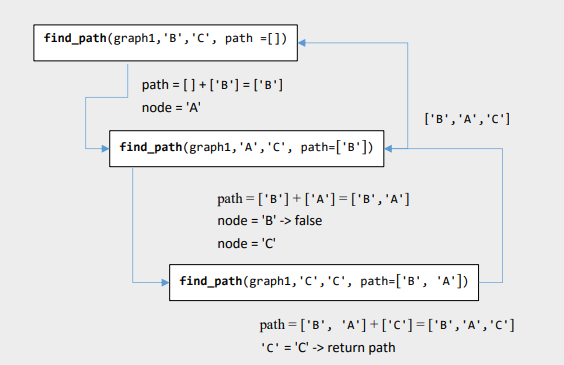

### 1.4.7 Example \#2

▪ Find a path from node A to E using the solution developed above.

In [ ]:
print("Path from A to E = ", find_path(graph_1, 'A', 'E'))

<span style = "color:red">
    
**Exercise \#1: Suppose the sequence of values of 'B' node defined in 'graph_1' is changed from \['A', 'D', 'E'\] to \['D', 'E', 'A'\], predict whether there will be any difference in term of path returned?**

</span>

In [ ]:
graph_1 = {'A':['B',"C"],
           'B':['D','E','A'],
           'C':['A','F'],
           'D':['B'],
           'E':['B','F'],
           'F':['C','E']}

print("Path from B to C = ", find_path(graph_1, 'B', 'C'))

<span style = "color:red">
    
**Exercise \#2: Understand illustration provided below that explains how the code works in search of a path from 'B' to 'C'.**

</span>

<img src="graph.jpg" width="250">

![explanation2.jpg](explanation2.jpg)

<span style = "color:red">
    
**Exercise \#3: Identifiy whether code given in Section 1.4.4 is implemented as Breadth-First Search or Depth-First Search. Justify your answer.**
    
<img src="bfs_dfs.png" width="600">

</span>

### 1.4.8 Is the First Solution Always the Best Solution?

<img src="first_solution.png" width="250">

### 1.4.9 Finding All Paths 

▪ Sometimes we want to see **all the alternative** solutions instead of only the first one we obtain, so that we can also determine the **shortest** or **longest** path.

In [ ]:
# find_all_paths() returns all solutions as a list of list, for instance, [[path_1], [path_2], [path_3]]
def find_all_paths(graph, start, end, path = []):
    
    if start not in graph:
        return []
    
    path = path + [start]
    if start == end:
        # "[path]" is used because [path] will be appended to a list [], for instance, [[path]], new_paths is a list of lists
        return [path] 

    # Create paths as a list to store different solutions as different lists
    paths = []
    
    for node in graph[start]:
        if node not in path:
            # Remark: this is line X in Exercise #3
            new_paths = find_all_paths(graph, node, end, path) 
            
            # If new_path is not empty, then new_path will be returned
            # This time the new_path is appended into a list
            for new_path in new_paths: # line Y
                paths.append(new_path)
    return paths

### 1.4.10 Example \#3

▪ Find all the paths from node B to C using the solution developed above.

In [ ]:
find_all_paths(graph_1, 'B', 'C')

<span style = "color:red">
    
**Exercise \#4: Understand illustration provided below that explains how the code works in search of a path from 'B' to 'C'.**

</span>

![step1.jpg](step1.jpg)

![step2a.png](step2a.png)

![step3.jpg](step3.jpg)

![step4.jpg](step4.jpg)

![step5.jpg](step5.jpg)

![step6.jpg](step6.jpg)

### 1.4.11 Example \#4

▪ Find all the paths from node A to C using the solution developed above.

In [ ]:
find_all_paths(graph_1, 'A', 'C')

## 1.5 The Missionary and Cannibal Problem

▪ The **Missionaries and Cannibals Problem** is a river crossing problem. 

<img src="boat_puzzle.png" width="400">

▪ It can be solved with the use of uninformed search strategies such as **depth-first search** and **breadth-first search**. 

### 1.5.1 Understanding the Problem

▪ To solve the problem, the following rules must be fulfilled: 

\>>> Three missionaries and three cannibals must cross a river using a boat which can carry at most **_two_** people.

\>>> The boat cannot cross the river by itself with no people on board.

\>>> At any point of time, if there are missionaries present on the bank, they cannot be outnumbered by cannibals. 

### 1.5.2 Implementation of Problem Formulation

In [ ]:
import math

# A State class is used to create a state object
class State():
    def __init__(self, cannibalLeft, missionaryLeft, boat, cannibalRight, missionaryRight):
        self.cannibalLeft = cannibalLeft
        self.missionaryLeft = missionaryLeft
        self.boat = boat
        self.cannibalRight = cannibalRight
        self.missionaryRight = missionaryRight
        self.parent = None 

    # is_goal() checks whether state is a goal state
    def is_goal(self): 
        if self.cannibalLeft == 0 and self.missionaryLeft == 0:
            return True
        else:
            return False
    
    # is_valid() checks whether the constraint is fulfilled
    def is_valid(self):
        if self.missionaryLeft >= 0 and self.missionaryRight >= 0 \
                   and self.cannibalLeft >= 0 and self.cannibalRight >= 0 \
                   and (self.missionaryLeft == 0 or self.missionaryLeft >= self.cannibalLeft) \
                   and (self.missionaryRight == 0 or self.missionaryRight >= self.cannibalRight):
            return True
        else:
            return False

    def __eq__(self, other):
        return self.cannibalLeft == other.cannibalLeft and self.missionaryLeft == other.missionaryLeft \
                   and self.boat == other.boat and self.cannibalRight == other.cannibalRight \
                   and self.missionaryRight == other.missionaryRight

    def __hash__(self):
        return hash((self.cannibalLeft, self.missionaryLeft, self.boat, self.cannibalRight, self.missionaryRight))

# A successor function defines the possible next states in which in which the current state can be transformed into.
def successors(cur_state):
    children = []
    if cur_state.boat == 'left':
        
        # Two missionaries cross left to right.
        new_state = State(cur_state.cannibalLeft, cur_state.missionaryLeft - 2, 'right',
                                  cur_state.cannibalRight, cur_state.missionaryRight + 2)
        if new_state.is_valid():
            new_state.parent = cur_state  # Make the state passed in as parameter as the parent state
            children.append(new_state) # Make the new generated state as the successor state

        # Two cannibals cross left to right.
        new_state = State(cur_state.cannibalLeft - 2, cur_state.missionaryLeft, 'right',
                                  cur_state.cannibalRight + 2, cur_state.missionaryRight)
        if new_state.is_valid():
            new_state.parent = cur_state
            children.append(new_state)
        
        # One missionary and one cannibal cross left to right.
        new_state = State(cur_state.cannibalLeft - 1, cur_state.missionaryLeft - 1, 'right',
                                  cur_state.cannibalRight + 1, cur_state.missionaryRight + 1)
        if new_state.is_valid():
            new_state.parent = cur_state
            children.append(new_state)

        # One missionary crosses left to right.
        new_state = State(cur_state.cannibalLeft, cur_state.missionaryLeft - 1, 'right',
                                  cur_state.cannibalRight, cur_state.missionaryRight + 1)
        if new_state.is_valid():
            new_state.parent = cur_state
            children.append(new_state)

        # One cannibal crosses left to right.
        new_state = State(cur_state.cannibalLeft - 1, cur_state.missionaryLeft, 'right',
                                  cur_state.cannibalRight + 1, cur_state.missionaryRight)
        if new_state.is_valid():
            new_state.parent = cur_state
            children.append(new_state)
    else:
        # Two missionaries cross right to left.
        new_state = State(cur_state.cannibalLeft, cur_state.missionaryLeft + 2, 'left',
                                  cur_state.cannibalRight, cur_state.missionaryRight - 2)
        if new_state.is_valid():
            new_state.parent = cur_state
            children.append(new_state)
            
        ## Two cannibals cross right to left.  
        new_state = State(cur_state.cannibalLeft + 2, cur_state.missionaryLeft, 'left',
                                  cur_state.cannibalRight - 2, cur_state.missionaryRight)
        if new_state.is_valid():
            new_state.parent = cur_state
            children.append(new_state)
            
        ## One missionary and one cannibal cross right to left.
        new_state = State(cur_state.cannibalLeft + 1, cur_state.missionaryLeft + 1, 'left',
                                  cur_state.cannibalRight - 1, cur_state.missionaryRight - 1)
        if new_state.is_valid():
            new_state.parent = cur_state
            children.append(new_state)
            
        ## One missionary crosses right to left.
        new_state = State(cur_state.cannibalLeft, cur_state.missionaryLeft + 1, 'left',
                                  cur_state.cannibalRight, cur_state.missionaryRight - 1)
        if new_state.is_valid():
            new_state.parent = cur_state
            children.append(new_state)
            
        ## One cannibal crosses right to left.
        new_state = State(cur_state.cannibalLeft + 1, cur_state.missionaryLeft, 'left',
                                  cur_state.cannibalRight - 1, cur_state.missionaryRight)
        if new_state.is_valid():
            new_state.parent = cur_state
            children.append(new_state)
            
    return children

### 1.5.3 Prolem Solving with Breadth First Search

In [ ]:
def breadth_first_search():
    print("=== BFS ===")
    
    # Create an object to represent the initial state: 3 cannibals and 3 missionaries on the left bank
    initial_state = State(3, 3, 'left', 0, 0) 
    
    # Check if the initial state is the goal state, if yes, then the rest of the operation can be skipped
    if initial_state.is_goal():
        return initial_state
    
    # Create a frontier list to store generated (or to be expanded) nodes
    frontier = list()
    
    # Create an explored list to store explored (or expanded) nodes
    explored = set()
    
    # Add the initial state (root node) to the frontier
    frontier.append(initial_state)
    
    while frontier:        
        # Removes the first item (index = 0) from frontier and assign it to state
        state = frontier.pop(0)
        
        if state.is_goal():
            return state # If a solution is found, the goal state is returned
        
        # Add the first item removed from frontier to explored
        explored.add(state)
        
        # Use state as the parent node to generate all possible child nodes via successors() function
        children = successors(state)
        
        for child in children:
            if (child not in explored) and (child not in frontier):
                # Add child to the end of the frontier
                frontier.append(child)
    return None

### 1.5.4 Prolem Solving with Depth First Search

In [ ]:
def depth_first_search():
    print("=== DFS ===")
    
    # Create an object to represent the initial state: 3 cannibals and 3 missionaries on the left bank
    initial_state = State(3, 3, 'left', 0, 0)
    
    if initial_state.is_goal():
        return initial_state
    
    # Create a frontier list to store generated (or to be expanded for successors generation later) nodes
    frontier = list() 
    
    # Create an explored list to store explored (or expanded) nodes
    explored = set()  
    
    # Add the initial state to the front (index = 0) of the frontier
    frontier.insert(0, initial_state)
    
    while frontier:
        # Removes the first item (index = 0) from frontier and assign it to state
        state = frontier.pop(0)
        
        if state.is_goal():
            return state

        # Add the first item removed from frontier to explored
        explored.add(state)

        # Use state as the parent node to generate all possible child nodes via successors() function
        children = successors(state) 
        children.reverse()
        
        for child in children:
            if (child not in explored) and (child not in frontier):
                # Add child to the front of the frontier
                frontier.insert(0, child)
    return None

### 1.5.5 Deployment of Solutions

In [ ]:
def print_solution(solution): 
    # Create an empty path list
    path = []  
    
    # Append the goal node to the end of path (which is an empty list now)
    path.append(solution)
    
    # Assign the parent state of the goal state to a variable named parent
    parent = solution.parent  
    
    # The loop will break when it reaches the root node because it doesn't have a parent
    while parent:  
        path.append(parent) 
        
        # Assign the parent state of the parent state to the variable named parent
        parent = parent.parent

    for t in range(len(path)):          
        # Print backward starting from the last item in the list until the first one 
        state = path[len(path) - t - 1]  
        
        # Print the state
        print('(',(state.cannibalLeft), ",", (state.missionaryLeft), ",", \
              state.boat, ",", (state.cannibalRight), ",", (state.missionaryRight), ")")
        
def main():
    solution1 = breadth_first_search()
    print_solution(solution1)
    
    print()
    
    solution2 = depth_first_search()
    print_solution(solution2)

main()

<span style = "color:red">
    
**Exercise \#5: Identify elements of the problem formulation in the code given above.**

\>>> **Initial state**: ?

\>>> **Successor function**: ?

\>>> **Goal test**: ?

\>>> **Step cost**: ? 

\>>> **Path cost**: ?
    
</span>

<span style = "color:red">
    
**Exercise \#6: Identify ONE (1) important line of code in BFS and DFS that reflects the main difference between the two algorithms.**
    
</span>

<span style = "color:red">
    
**Exercise \#7: Write simple python code that calculates the cost of the solution path returned.**
    
</span>